# Лабораторная работа №2
## Вариант 7

In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt      

%matplotlib inline
plt.style.use('fast')

## Задача 1

In [60]:
n = 20

a = pd.Series([0]*n, [i for i in range(n-1, -1, -1)])
print(f"""Серия значений: 
{a}

Длинна: {len(a)}
Размерность: {a.shape}
Число элементов: {len(a)}
Тип элементов: {type(a[0])}
Число уникальных значений: {len(a.unique())}""")

Серия значений: 
19    0
18    0
17    0
16    0
15    0
14    0
13    0
12    0
11    0
10    0
9     0
8     0
7     0
6     0
5     0
4     0
3     0
2     0
1     0
0     0
dtype: int64

Длинна: 20
Размерность: (20,)
Число элементов: 20
Тип элементов: <class 'numpy.int64'>
Число уникальных значений: 1


## Задача 2

In [61]:
df = pd.read_csv("seeds.csv")
del df["compact"], df["grooveLen"], df["perim"]
df


,area,len,width,asym,class,region_id
0,15.26,5.763,3.312,2.221,Kama,6
1,14.88,5.554,3.333,1.018,Kama,1
2,14.29,5.291,3.337,2.699,Kama,10
3,13.84,5.324,3.379,2.259,Kama,4
4,16.14,5.658,3.562,1.355,Kama,1
...,...,...,...,...,...,...
205,12.19,5.137,2.981,3.631,Canadian,3
206,11.23,5.140,2.795,4.325,Canadian,4
207,13.20,5.236,3.232,8.315,Canadian,6
208,11.84,5.175,2.836,3.598,Canadian,6


In [62]:
print(f"""Список колонок: {df.columns}
Число строк: {df.shape[0]}
Размерность: {df.shape}
Общее число элементов: {len(df)}
Есть пустые элементы: {True in df.isnull()}

Первые 3 строки:
{df.head(3)}

Последние 3 строки:
{df.tail(3)}""")

Список колонок: Index(['area', 'len', 'width', 'asym', 'class', 'region_id'], dtype='object')
Число строк: 210
Размерность: (210, 6)
Общее число элементов: 210
Есть пустые элементы: False

Первые 3 строки:
    area    len  width   asym class  region_id
0  15.26  5.763  3.312  2.221  Kama          6
1  14.88  5.554  3.333  1.018  Kama          1
2  14.29  5.291  3.337  2.699  Kama         10

Последние 3 строки:
      area    len  width   asym     class  region_id
207  13.20  5.236  3.232  8.315  Canadian          6
208  11.84  5.175  2.836  3.598  Canadian          6
209  12.30  5.243  2.974  5.637  Canadian          1


In [63]:
for col in df.columns:
    print(f"""Колонка: {col}
Тип данных: {type(df[col][0])}
Число уникальных элементов: {len(df[col].unique())}""")
    if type(df[col][0]) == np.float64:
        print(f"""Максимальный элемент: {df[col].max()}
Минимальный элемент: {df[col].min()}
Среднее арифметическое: {df[col].mean()}""")
    print()

Колонка: area
Тип данных: <class 'numpy.float64'>
Число уникальных элементов: 193
Максимальный элемент: 21.18
Минимальный элемент: 10.59
Среднее арифметическое: 14.84752380952381

Колонка: len
Тип данных: <class 'numpy.float64'>
Число уникальных элементов: 188
Максимальный элемент: 6.675
Минимальный элемент: 4.899
Среднее арифметическое: 5.628533333333334

Колонка: width
Тип данных: <class 'numpy.float64'>
Число уникальных элементов: 184
Максимальный элемент: 4.033
Минимальный элемент: 2.63
Среднее арифметическое: 3.258604761904762

Колонка: asym
Тип данных: <class 'numpy.float64'>
Число уникальных элементов: 207
Максимальный элемент: 8.456
Минимальный элемент: 0.7651
Среднее арифметическое: 3.700200952380953

Колонка: class
Тип данных: <class 'str'>
Число уникальных элементов: 3

Колонка: region_id
Тип данных: <class 'numpy.int64'>
Число уникальных элементов: 10



## Задача 3

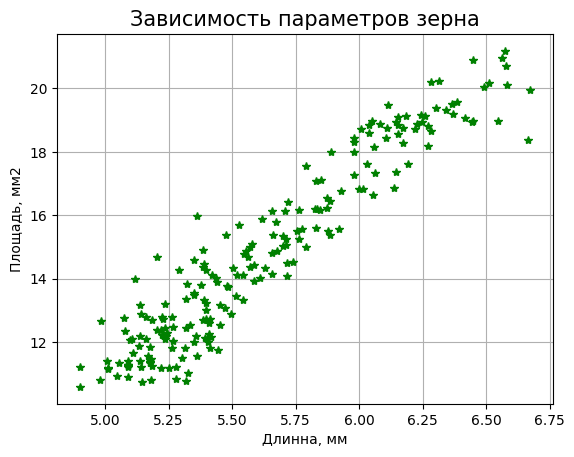

In [66]:

plt.plot(df['len'], df['area'], '*g')
plt.ylabel("Площадь, мм2")
plt.xlabel("Длинна, мм")
plt.title('Зависимость параметров зерна', fontsize=15)
plt.grid(True)
print()

Выбрана точечная диаграмма, так как выборка содержит множество различных значений площади для зерён конкретной длинны. Такая диограмма позволяет определить характер зависимости одного признака от другого. В данном случае можно наблюдать некоторую линейную зависимость.

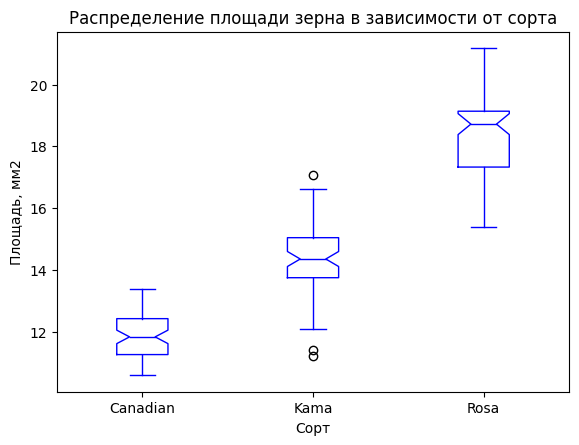

In [65]:
plt.close()
colors = ['pink', 'lightblue', 'lightgreen']
ax = df.boxplot(column='area', by='class', patch_artist=False, notch=True, color="blue", grid=False)

ax.get_figure().suptitle('')

ax.set_xlabel("Сорт")
ax.set_ylabel("Площадь, мм2")
ax.set_title('Распределение площади зерна в зависимости от сорта')

print()

Выбрана диаграмма boxplot, так как по оси абцисс расположен категориальный признак, а по оси ординат - непрерывный, что позволяет сравнить распределение значение непрерывного признака у зерён разных котегорий. Такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.

## Задача 4

Данные ежедневных измерений погоды в разных городах с 2008 по 2017 гг.

In [52]:
df_raw = pd.read_csv("weatherAUS.csv", parse_dates=['Date'])
df_raw.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


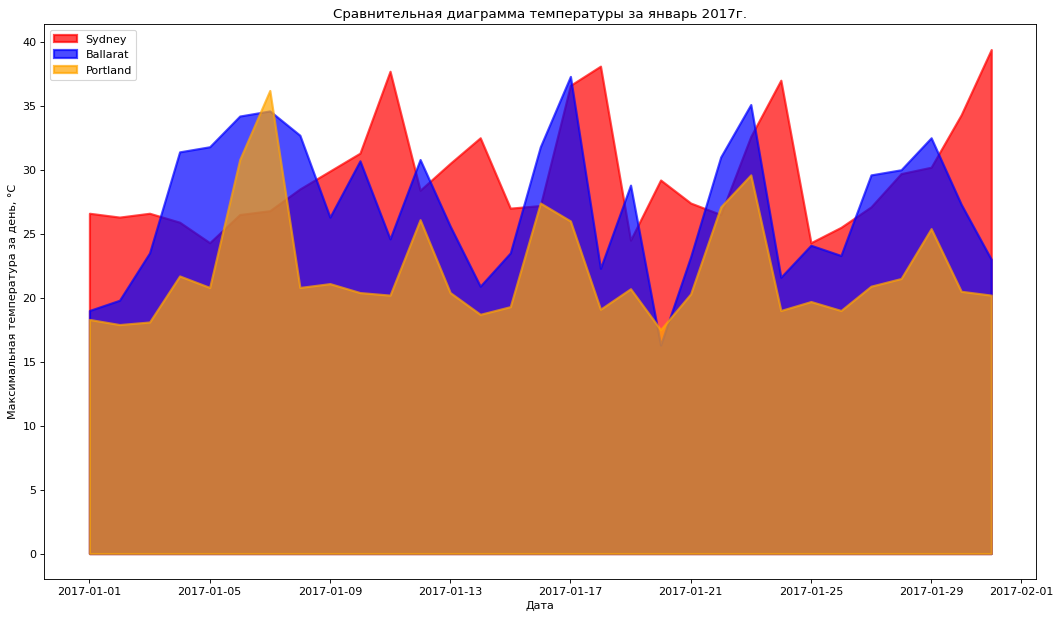

In [68]:

plt.close()

# Отбираем данные за январь 2017 г.
df = df_raw.loc[(pd.to_datetime("2017-01-01") <= df_raw["Date"]) & (df_raw["Date"] < pd.to_datetime("2017-02-01"))] 

#print(df["Location"].unique())
Locations = ["Sydney", "Ballarat", "Portland"]
df = df[df["Location"].isin(Locations)]

colors = ['red', 'blue', 'orange', 'brown', 'grey', 'green', 'olive', 'red']  

x_data = df["Date"].unique()
y_data = [(df[df["Location"] == i]["MaxTemp"]) for i in Locations]


fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
for i in range(len(Locations)):
    ax.fill_between(x, y1=y_data[i], y2=0, label=Locations[i], alpha=0.7, color=colors[i], linewidth=2)

plt.legend(loc='upper left')

plt.title("Сравнительная диаграмма температуры за январь 2017г.")
plt.xlabel("Дата")
plt.ylabel("Максимальная температура за день, °C")
print()


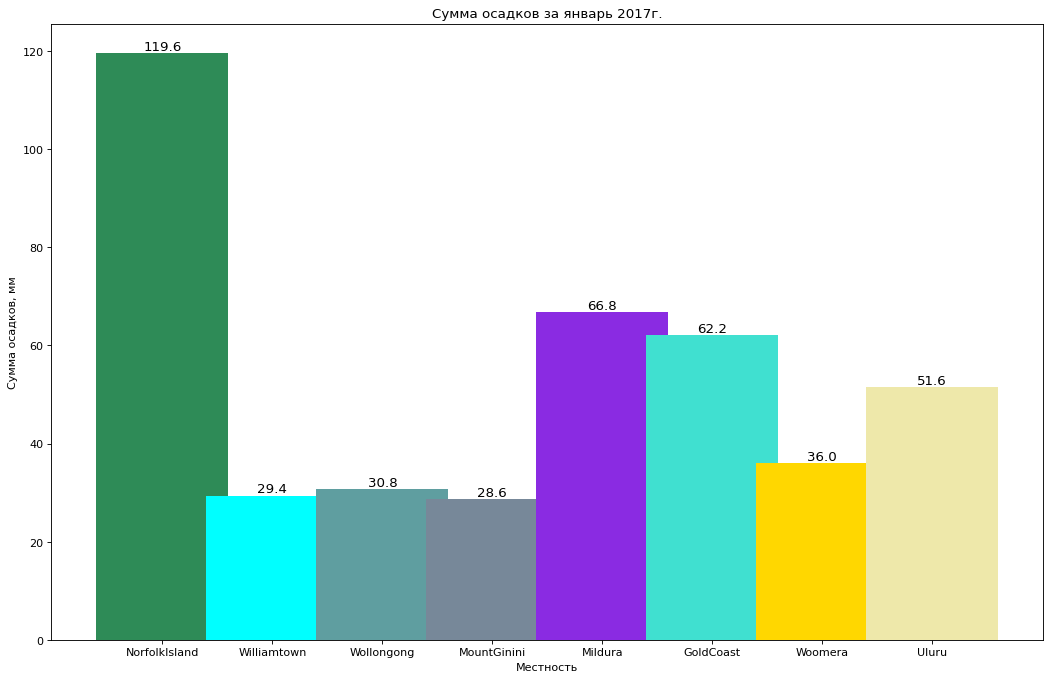

In [107]:
plt.close()
from random import choices

# Отбираем данные за январь 2017 г.
df = df_raw.loc[(pd.to_datetime("2017-01-01") <= df_raw["Date"]) & (df_raw["Date"] < pd.to_datetime("2017-02-01"))] 

n = 10
Locations = choices(df["Location"].unique(), k=n)
df = df[df["Location"].isin(Locations)]

y_data = df.groupby('Location')["Rainfall"].sum()

all_colors = list(plt.cm.colors.cnames.keys())
c = choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df["Location"].unique(), y_data, color=c,  width=1.2)

for i, val in enumerate(y_data.values):
    plt.text(i, val, round(float(val), 3), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.title("Сумма осадков за январь 2017г.")
plt.xlabel("Местность")
plt.ylabel("Сумма осадков, мм")
print()